In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Get Dataset from Kaggle
# Requires the kaggle package to download dataset. Uncomment the line below to install
# !pip3 install kaggle
import kaggle
# Requires kaggle.json (Kaggle API Key) placed in ~/.kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files("drgilermo/nba-players-stats", path="./data/", unzip=True)
player_data = pd.read_csv("./data/player_data.csv")


In [2]:
# seasons_stats.dropna(how='all',axis=0)
seasons_stats = pd.read_csv("./data/Seasons_Stats.csv")
seasons_stats.drop(['Unnamed: 0', 'blanl', 'blank2'], axis=1, inplace=True)
seasons_stats.dropna(inplace=True)
seasons_stats.drop(['Year', 'Player'], axis=1, inplace=True)
seasons_stats

,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5730,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,0.023,0.548,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5748,PF,23.0,BOS,82.0,82.0,2955.0,20.5,0.538,0.098,0.246,...,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,1745.0
5781,SF,29.0,BOS,82.0,7.0,1994.0,14.6,0.526,0.054,0.316,...,0.739,106.0,224.0,330.0,156.0,120.0,36.0,143.0,214.0,914.0
5786,SG,33.0,BOS,60.0,0.0,523.0,7.8,0.402,0.032,0.222,...,0.762,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,167.0
5802,C,31.0,BOS,66.0,55.0,2159.0,14.8,0.477,0.013,0.131,...,0.779,126.0,408.0,534.0,206.0,69.0,61.0,108.0,216.0,940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24685,PF,28.0,IND,74.0,74.0,2237.0,14.9,0.562,0.172,0.125,...,0.523,131.0,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0
24686,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24689,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
le = LabelEncoder()
y = seasons_stats['Pos']
y = le.fit_transform(y)
X = seasons_stats.drop('Pos', axis=1)
X['Tm'] = le.fit_transform(X['Tm'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6702091189578334


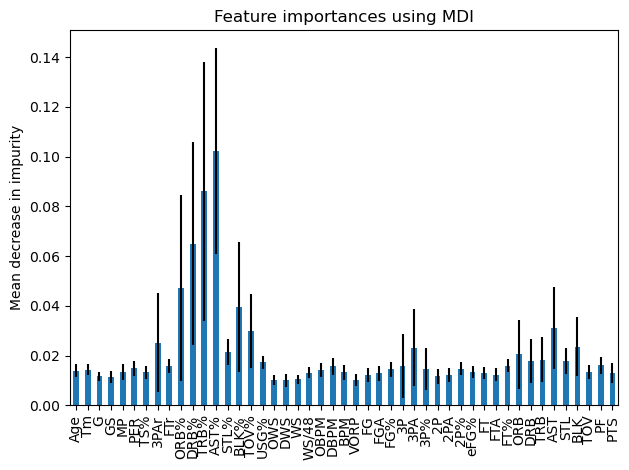

In [7]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=list(X.columns))
fig, ax = plt.subplots()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
forest_importances.plot.bar(yerr=std, ax=ax)
fig.tight_layout()

In [8]:
print(forest_importances.sort_values(ascending=False).head(5))

AST%    0.102348
TRB%    0.086079
DRB%    0.065071
ORB%    0.047309
BLK%    0.039504
dtype: float64


In [9]:
# seasons_stats.dropna(how='all',axis=0)
seasons_stats = pd.read_csv("./data/Seasons_Stats.csv")
seasons_stats.drop(['Unnamed: 0', 'blanl', 'blank2'], axis=1, inplace=True)
seasons_stats.dropna(inplace=True)
seasons_stats.drop(['Year', 'Player'], axis=1, inplace=True)
y = seasons_stats['Pos']
y = le.fit_transform(y)
X = seasons_stats[['AST%', 'TRB%', 'DRB%', 'ORB%', 'BLK%']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6019883441892355


In [10]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='multi:softmax')
bst.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [13]:
preds = bst.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.36784367500857046


In [16]:
# seasons_stats.dropna(how='all',axis=0)
seasons_stats = pd.read_csv("./data/Seasons_Stats.csv")
seasons_stats.drop(['Unnamed: 0', 'blanl', 'blank2'], axis=1, inplace=True)
seasons_stats.dropna(inplace=True)
seasons_stats.drop(['Year', 'Player'], axis=1, inplace=True)
y = seasons_stats['Pos']
y = le.fit_transform(y)
X = seasons_stats.drop('Pos', axis=1)
X['Tm'] = le.fit_transform(X['Tm'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
bst1 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='multi:softmax')
bst1.fit(X_train, y_train)
preds = bst.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)


Accuracy: 0.38189921151868356
